###Topic 6.

Consider logistic regression on two features. Build a surface with 3 axes: w1, w2, sigma (optimized hyperparameter for the normal prior with scalar variance). Use color of the surface for the posterior value display. Model: logistic regression. Dataset: on your choice (synthetic dataset is allowed). Optimization of sigma: on your choice (Laplace approximation or exhaustive search).

We have logistic regression $f(x, w) = \frac 1 {1 + \exp(-w^{T}x)}$ and suppose that $w \sim N(0, \sigma^2)$

Posterior $p(w|D, \sigma) = \frac {p(D|w)p(w|\sigma)}{p(D)}$. 

If we want to find optimal $\sigma$ for given $w$ (as stated in the assignment), we need maximize only $p(w|\sigma)$. It can be easy solved and $\sigma = |w_{1, 2}|$ (if $w \neq \mu$), so it is not intresting.

If we want to find optimal $\sigma$, we need to maximize $p(D|\sigma) = \int p(D|w)p(w|\sigma)dw$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression
from scipy.stats import multivariate_normal

In [2]:
rv = multivariate_normal([1.5, -0.2], [[2.0, 0.3], [0.3, 0.5]])
x0 = rv.rvs(30)
rv = multivariate_normal([-1.5, -1.2], [[0.5, 0.3], [0.3, 2.0]])
x1 = rv.rvs(30)

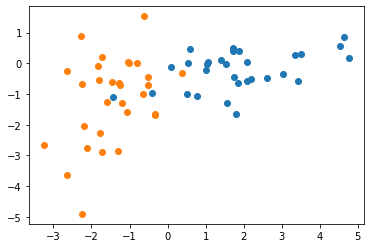

In [3]:
plt.scatter(x0[:,0], x0[:,1])
plt.scatter(x1[:,0], x1[:,1])

plt.show()

In [4]:
W2 = np.linspace(-2,2,30)
W1 = np.linspace(-2,2,30)
P_D = []

model = LogisticRegression()

model.intercept_ = np.array([0])
model.classes_ = np.array([0, 1])

for w1 in W1:
  for w2 in W2:
    model.coef_ = np.array([[w1, w2]])
    p0 = model.predict_proba(x0)
    p1 = model.predict_proba(x1)
    p = np.prod(p0[:,0])*np.prod(1-p1[:,1])

    P_D.append(p)

P_D = np.array(P_D)

In [5]:
def integral(P, W1, W2, sigma):
  err = norm(loc=0, scale=sigma)
  i = 0
  S = 0
  for w1 in W1:
    for w2 in W2:
      S += P[i]*err.pdf(w1)*err.pdf(w2)
      i += 1

  return S/len(P)

SIGMAS = np.linspace(0.1, 2.1, 50)
integrals = []
for sigma in SIGMAS:
  integrals.append(integral(P_D, W1, W2, sigma))

print("Best sigma: ", SIGMAS[np.argmax(integrals)])
best_sigma = SIGMAS[np.argmax(integrals)]

Best sigma:  1.1612244897959183


Posterior $p(w|D, \sigma) = \frac {p(D|w)p(w|\sigma)}{p(D)} \sim p(D|w)p(w|\sigma)$. 

In [6]:
P_W = []

err = norm(loc=0, scale=best_sigma)
i = 0
S = 0
for w1 in W1:
  for w2 in W2:
    P_W.append(P_D[i]*err.pdf(w1)*err.pdf(w2))
    i += 1

P_W = np.array(P_W).reshape(W1.shape[0], W2.shape[0])

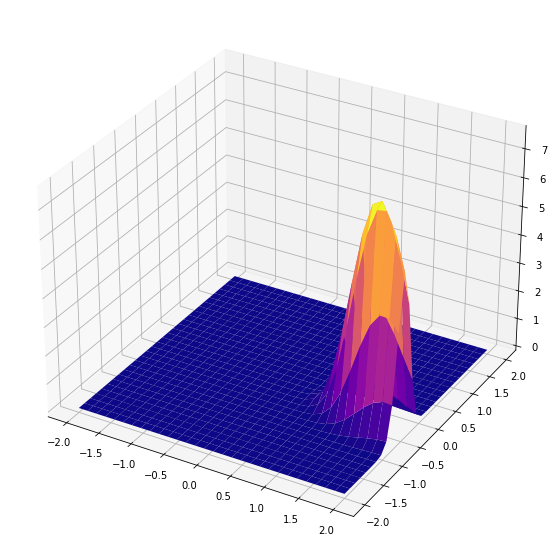

In [9]:
W1_, W2_ = np.meshgrid(W1, W2)

fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W1_, W2_, P_W, cmap="plasma")

plt.show()